# 로지스틱 회귀(Logistic Regression)

종속변수가 범주형인 경우에 적용하는 회귀분석: **분류분석!**

* 종속변수 Y를 직접 모델링하지 않고, Y가 특정 범주에 속하는 확률을 모델링
* X가 아주 큰 음수일 때 0이 되고 X가 아주 큰 양수일 때 1이 되도록 시그모이드 함수(또는 로지스틱 함수)를 사용
* 다중 분류 가능 - 다항 로지스틱 회귀 / 소프트맥스 회귀
    * 소프트맥스 함수: k개의 클래스가 있을 때 k차원의 벡터를 입력받아 **각 클래스에 대한 점수를 계산**하고, 그 점수에 소프트맥스 함수를 적용해 **각 클래스의 확률을 추정**
    
    ```LogisticRegression(multi_class='multinomial', solver='lbfgs)```

<img src='./imgs/sigmoid.png' width='380px' height='180px'></img>

* 오즈비(승산비, Odds): 실패에 비해 성공할 확률

    성공확률을 p라 할 때, Odds는 p/(1-p)로 계산

* 로지스틱 회귀 모델의 데이터 학습 목적은 1에 대해 높은 확률을 추정하고 0에 대해 낮은 확률을 추정하는 모델의 파라미터를 찾는 것

    👉 최대 우도 추정법(MLE: Maximum Likelihood Estimation)을 사용


**예측 시 다른 회귀 알고리즘과 다르게 ```predict_proba(x)```함수 활용**


In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## body-performance 예제 - 이진분류 -

**columns**

data shape : (13393, 12)

age : 20 ~64 나이

gender : F,M 성별

height_cm : (If you want to convert to feet, divide by 30.48) 키

weight_kg 몸무게

body fat_% 체지방률

diastolic : diastolic blood pressure (min) 이완기 혈압

systolic : systolic blood pressure (min) 수축기 혈압
 
gripForce 악력

sit and bend forward_cm 쪼그려 굽혀뛰기 기록

sit-ups counts 윗몸일으키기 기록

broad jump_cm 멀리뛰기 기록

**[target]** class : A,B,C,D ( A: best) / stratified # 신체 등급

In [2]:
# body-performance 예제
body = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/bodyPerformance.csv')
body.head()


,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


* ```np.where(조건, T일때 값, F일때 값)```

In [3]:
# gender, class 컬럼 전처리
body['gender'] = np.where(body['gender'] == 'M', 0, 1) # np.where(조건, T일때 값, F일때 값)
body['class_1'] = np.where(body['class'] == 'A', 1, 0)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0


In [4]:
# 학습, 테스트 데이터 분할
x = body.iloc[:, :-2]
y = body['class_1']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)

# 모델링
## 모델
log = LogisticRegression(random_state=45)
## 학습
log.fit(x_train, y_train)
## 예측
y_pred_tr = log.predict_proba(x_train)
y_pred_tr

array([[0.98428261, 0.01571739],
       [0.01694488, 0.98305512],
       [0.7331057 , 0.2668943 ],
       ...,
       [0.90860463, 0.09139537],
       [0.87804749, 0.12195251],
       [0.95330209, 0.04669791]])

In [5]:
# 시각화
## 시각화용 df생성
cs = log.decision_function(x_train) # z값 반환(얼만큼 떨어져있는지!) confidence score
df = pd.concat([pd.DataFrame(y_pred_tr), pd.DataFrame(cs)], axis=1)
df.columns = ['0', '1', 'decision_function']
df.sort_values('decision_function', inplace=True)
df.reset_index(inplace=True, drop=True)
df

,0,1,decision_function
0,9.999999e-01,7.107047e-08,-16.459594
1,9.999998e-01,1.679062e-07,-15.599860
2,9.999998e-01,1.720977e-07,-15.575203
3,9.999998e-01,2.081467e-07,-15.385022
4,9.999998e-01,2.350574e-07,-15.263436
...,...,...,...
9370,4.128910e-03,9.958711e-01,5.485604
9371,4.027911e-03,9.959721e-01,5.510471
9372,1.868852e-03,9.981311e-01,6.280560
9373,1.659105e-03,9.983409e-01,6.399816


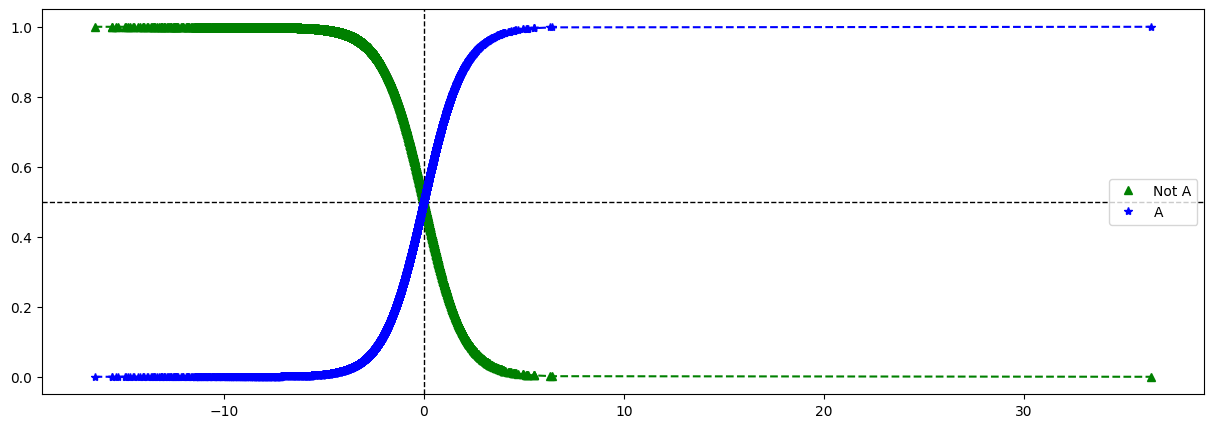

In [6]:
## 그래프
plt.figure(figsize=(15,5))

plt.axhline(y=0.5, linestyle='--', color='black', linewidth=1) # 수평선 (성공확률 0.5 기준점)
plt.axvline(x=0, linestyle='--', color='black', linewidth=1) #수직선 (X값 기준점)

plt.plot(df['decision_function'], df['0'], 'g^', label='Not A')
plt.plot(df['decision_function'], df['0'], 'g--') # 데이터가 적은 부분까지 표시 되게끔
plt.plot(df['decision_function'], df['1'], 'b*', label='A')
plt.plot(df['decision_function'], df['1'], 'b--')

plt.legend();

In [7]:
# 성능 확인
y_pred_tt = log.predict(x_test)
cm = confusion_matrix(y_test, y_pred_tt) # 혼동행렬
acc = accuracy_score(y_test, y_pred_tt) # 정확도
prc = precision_score(y_test, y_pred_tt) # 정밀도 (1이라고 예측 중 1)
rc = recall_score(y_test, y_pred_tt) # 재현율(실제 1 중 예측 성공)
f1 = f1_score(y_test, y_pred_tt) # 정밀, 재현 조화 평균

print(cm)
print(f'''
      정확도: {acc}
      정밀도: {prc}
      재현율: {rc}
      F1_Score: {f1}''')



[[2783  244]
 [ 372  619]]

      정확도: 0.8466898954703833
      정밀도: 0.7172653534183082
      재현율: 0.6246215943491423
      F1_Score: 0.667745415318231


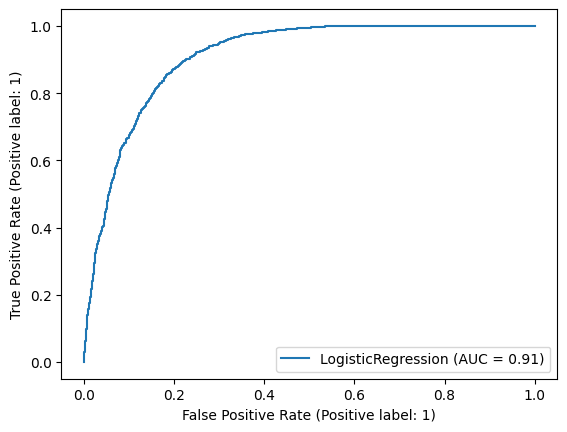

In [8]:
# ROC Curve 와 AUC 시각화
RocCurveDisplay.from_estimator(log, x_test, y_test) # RocCurveDisplay.from_estimator(모델, x, y)
plt.show();

## body-performance 예제 - 다중분류(Softmax) -

In [12]:
# 다중 분류 클래스 컬럼 추가
mapping = {'A':0, 'B':1, 'C':2, 'D':3}
body['class_2'] = body['class'].map(mapping)
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,class_1,class_2
0,27.0,0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,0,2
1,25.0,0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,1,0
2,31.0,0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,0,2
3,32.0,0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,0,1
4,28.0,0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,0,1


* LogisticRegression(solver, C 파라미터 설명)
    * solver: 비용함수의 최솟값을 어떤 방법으로 찾을 것인지 

        newton-cg, lbfgs: 뉴튼 랩슨 방법
            * 뉴튼 랩슨 방법: 

        liblinear, sag, saga: 경사하강법 
    * C: 정규화 강도의 역수, 값이 작을수록 더 강한 정규화가 적용됨

In [13]:
# 데이터 분할
x = body.iloc[:, :-3]
y = body['class_2']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1, stratify=y) # 클래스 불균형 고려
# 모델 학습
softmx = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10, random_state=45)
softmx.fit(x_train, y_train)
# 예측
y_pred_tt = softmx.predict(x_test)
# 일반화 성능
cm = confusion_matrix(y_test, y_pred_tt)
acc = accuracy_score(y_test, y_pred_tt)
print(cm)
print(f'테스트 정확도: {acc.round(3)}%')

[[707 261  36   0]
 [269 403 300  32]
 [ 92 207 525 181]
 [ 13  63 157 772]]
테스트 정확도: 0.599%
